In [153]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D

In [154]:
def normalize(arr):
    mean = arr.mean()
    # print(mean) 
    # variance = acid_arr.var() 
    std_dev = arr.std()  
    arr = (arr - mean)/std_dev  
    return arr

In [155]:
test_input = pd.read_csv("./ass1_data/data/q4/q4x.dat", sep ='\s+', header=None)  
# print(test_input)
x1 = test_input.iloc[:, 0].to_numpy() 
x2 = test_input.iloc[:, 1].to_numpy() 

x1 = normalize(x1) 
x2 = normalize(x2) 
# print(x1) 
# print(x2) 

m = x1.shape[0] 
X = np.zeros((m, 2)) 

X[:, 0] = x1 
X[:, 1] = x2 
# print(X)
test_output = pd.read_csv("./ass1_data/data/q4/q4y.dat", header=None) 
test_output = [ (1 if label.iloc[0] == "Alaska" else 0) for index,label in test_output.iterrows() ]

# print(test_output)
Y = np.array(test_output) 
# print(test_output) 


In [156]:
def get_filtered(X, Y, label):
    filtered = []
    for i in range(Y.size):
        if (Y[i] == label):
            filtered.append(X[i]) 
    return np.array(filtered) 

In [157]:
def compute_sigma_vector(x):
    mean = np.mean(x, axis = 0) 
    mean = np.array([[j] for j in mean])  
    x_modified = np.array([ [[j] for j in i]  for i in x])
    sigma = [ (i - mean) @ np.transpose(i - mean)   for i in x_modified] 
    return np.array(sigma) 



## finding GDA parameters

In [158]:
x_0 = get_filtered(X, Y, 0) 
x_1 = get_filtered(X, Y, 1) 

mean_0 = np.mean(x_0, axis = 0) 
mean_1 = np.mean(x_1, axis = 0)  
print(mean_0) 
print(mean_1)

phi = (x_1).shape[0]/ ( (x_1).shape[0] + (x_0).shape[0]) 
print(phi)

sigma_0 = compute_sigma_vector(x_0) 
sigma_1 = compute_sigma_vector(x_1)  
# print(sigma_0) 

sum_0 = np.sum(sigma_0, axis = 0) 
sum_1 = np.sum(sigma_1, axis = 0) 

covariance = (sum_0 + sum_1)/m 
print(covariance) 

[ 0.75529433 -0.68509431]
[-0.75529433  0.68509431]
0.5
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


In [159]:
def plot_line(theta, legend):
    x_coords = np.arange(-3,3, 0.5) 
    # print(x_coords)
    print(theta)
    y_coords = (-theta[0] - theta[1] * x_coords )/ theta[2] 
    plt.plot(x_coords, y_coords, label = legend, color = "green")

## Plotting the boundary line

[ 2.22044605e-15  6.77850904e+00 -4.87716799e+00]


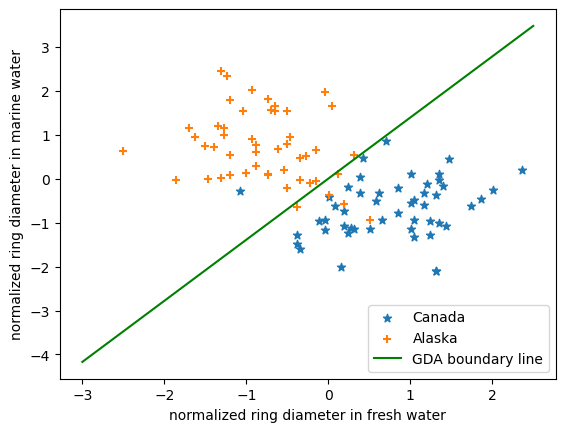

In [160]:

x = x_0[:, 0] 
y = x_0[:, 1] 

plt.scatter(x, y, marker = "*", label = "Canada")

x = x_1[:, 0] 
y = x_1[:, 1] 
plt.scatter(x, y, marker = "+", label = "Alaska")

intercept = np.transpose(mean_1) @ np.linalg.inv(covariance) @ mean_1 - np.transpose(mean_0) @ np.linalg.inv(covariance) @ mean_0

[theta_0, theta_1] = 2 * np.linalg.inv(covariance) @ np.transpose(mean_0 - mean_1) 

theta = np.array([intercept, theta_0, theta_1]) 

plot_line(theta, "GDA boundary line") 
plt.xlabel("normalized ring diameter in fresh water")
plt.ylabel("normalized ring diameter in marine water")
plt.legend() 

plt.show() 


## Quadratic boundary fitting

In [181]:
print(f"mean_0 is {mean_0}")
print(f"mean_1 is {mean_1}") 

covariance_0 = np.sum(sigma_0, axis = 0) / (sigma_0.shape)[0] 
covariance_1 = np.sum(sigma_1, axis = 0) / (sigma_1.shape)[0] 

print(f"covariance_0 is {covariance_0}")
print(f"covariance_1 is {covariance_1}")
print(f"overall covariance is {covariance}")


mean_0 is [ 0.75529433 -0.68509431]
mean_1 is [-0.75529433  0.68509431]
covariance_0 is [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]
covariance_1 is [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
overall covariance is [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


## Plotting the quadratic boundary fitting

[ 2.22044605e-15  6.77850904e+00 -4.87716799e+00]


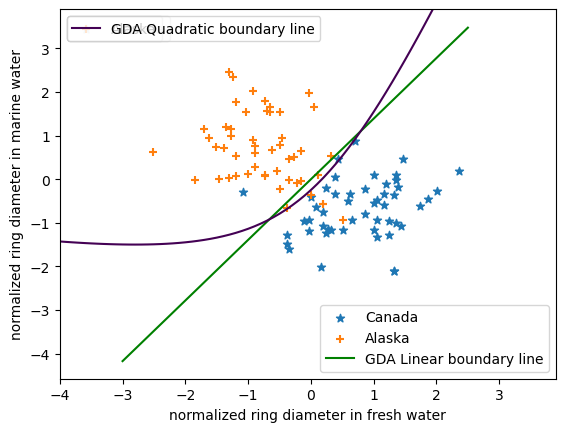

In [ ]:
#same plot as above 
x = x_0[:, 0] 
y = x_0[:, 1] 

scatter_plot1 = plt.scatter(x, y, marker = "*", label = "Canada")

x = x_1[:, 0] 
y = x_1[:, 1] 
scatter_plot2 = plt.scatter(x, y, marker = "+", label = "Alaska")


intercept = np.transpose(mean_1) @ np.linalg.inv(covariance) @ mean_1 - np.transpose(mean_0) @ np.linalg.inv(covariance) @ mean_0
[theta_0, theta_1] = 2 * np.linalg.inv(covariance) @ np.transpose(mean_0 - mean_1) 
theta = np.array([intercept, theta_0, theta_1]) 

plot_line(theta, "GDA Linear boundary line") 
plt.xlabel("normalized ring diameter in fresh water")
plt.ylabel("normalized ring diameter in marine water")
plt.legend() 



# plotting quadratic boundary 
x_space = np.arange(-20, 20, 0.1) 
y_space = np.arange(-20, 20, 0.1) 

X_mesh, Y_mesh  = np.meshgrid(x_space, y_space) 
row, col = X_mesh.shape 
# points = [ [[X_mesh[i,j], Y_mesh[i, j]] for j in range(col)] for i in range(row)] 

# points = np.array(points) 

inv0 = np.linalg.inv(covariance_0)
inv1 = np.linalg.inv(covariance_1)

z = np.zeros((row,col))
for i in range(row):
    for j in range(col):
        point = np.array([X_mesh[i,j], Y_mesh[i,j]])
        z[i,j] = (point.T) @ (inv1 - inv0) @ point + 2 * point.T @ (inv0 @ mean_0 - inv1 @ mean_1) + (mean_1.T @ inv1 @ mean_1 - mean_0.T @ inv0 @ mean_0)  

levels = [0]
contour_plot = plt.contour(X_mesh, Y_mesh, z, levels = levels , cmap = "viridis") 
contour_proxies = [Line2D([0], [0], color=contour_plot.collections[i].get_edgecolor()) for i in range(len(levels))]

scatter_legend1 = plt.legend(handles=[scatter_plot1] )
scatter_legend2 = plt.legend(handles=[scatter_plot2] )

plt.gca().add_artist(scatter_legend1)
plt.gca().add_artist(scatter_legend2)

legend3 = plt.legend(contour_proxies , [f'GDA Quadratic boundary line' for level in levels ]) 
plt.gca().add_artist(legend3) 
plt.legend() 

plt.show() 



## Comments

We see that the linear and the quadratic boundary lines divide the points with very high accuracy,
and are also very closely related to each other. Their accuracies are approximately 94% and 96% respectively. 
Thus the quadratic boundary is a slightly better fit than the linear boundary. This is because of the weaker set of assumptions taken in the GDA model for the quaadratic case, where we allow the two classes 
to have different covariance matrix. 